In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import calendar
import matplotlib
import matplotlib.pyplot as plt
from pylab import*
%matplotlib inline 
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 5)
import matplotlib as mpl

In [3]:
mpl.style.available
mpl.style.use('ggplot')

### Visualizando nuestro dataframe

In [4]:
df = pd.read_csv('data/alltopics.csv', index_col=0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12545 entries, 0 to 12544
Data columns (total 11 columns):
Usuario        12545 non-null object
Nombre         12545 non-null object
Fecha          12545 non-null object
Tweet          12545 non-null object
RT             12545 non-null int64
like           12545 non-null int64
path           12545 non-null object
verificados    235 non-null object
tópico         12545 non-null object
sentimiento    12545 non-null float64
categoría      12545 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB
None


In [5]:
df.head()

,Usuario,Nombre,Fecha,Tweet,RT,like,path,verificados,tópico,sentimiento,categoría
0,@jaymee_danielle,zen kitty,10 dic. 2017,issues i have w/ GMO:\n• doesnt taste “natural...,67,179,/jaymee_danielle/status/939965734196842496,NaN,Allergy,0.0900,Neutral
1,@systecdb,Dave Baggett,10 dic. 2017,It dawns on me that before GMO foods became pr...,0,1,/systecdb/status/939776697724997632,NaN,Allergy,0.4767,Positivo
2,@saltedveg,ingin punya tuyul saja,10 dic. 2017,Coz it's 'cool'. Just like people who suddenly...,1,1,/saltedveg/status/939675324765298688,NaN,Allergy,0.9068,Positivo
3,@RMathebulo,Rantho Mathebulo,9 dic. 2017,Alcoholism gout acne genetically modified food...,0,0,/RMathebulo/status/939601946960453633,NaN,Allergy,-0.7412,Negativo
4,@carmelabny,JOSEPHINE BOLOGNA,8 dic. 2017,Foods to eat every day and a healthy product t...,7,4,/carmelabny/status/939102225800028160,NaN,Allergy,0.4738,Positivo


### Convirtiendo la columna fecha como serie temporal

In [6]:
meses = {}
meses['ene.'] = '01'
meses['feb.'] = '02'
meses['mar.'] = '03'
meses['abr.'] = '04'
meses['may.'] = '05'
meses['jun.'] = '06'
meses['jul.'] = '07'
meses['ago.'] = '08'
meses['sept.'] = '09'
meses['oct.'] = '10'
meses['nov.'] = '11'
meses['dic.'] = '12'

In [7]:
nuevasfechas = []
for fecha in df['Fecha']:
    dia = fecha.split(' ')[0]
    mes = fecha.split(' ')[1]
    año = fecha.split(' ')[2]
    nuevomes = meses[mes]
    nuevafecha = año+'-'+nuevomes+'-'+dia
    nuevasfechas.append(nuevafecha)
df['serie_temporal'] = nuevasfechas
df.head()

,Usuario,Nombre,Fecha,Tweet,RT,like,path,verificados,tópico,sentimiento,categoría,serie_temporal
0,@jaymee_danielle,zen kitty,10 dic. 2017,issues i have w/ GMO:\n• doesnt taste “natural...,67,179,/jaymee_danielle/status/939965734196842496,NaN,Allergy,0.0900,Neutral,2017-12-10
1,@systecdb,Dave Baggett,10 dic. 2017,It dawns on me that before GMO foods became pr...,0,1,/systecdb/status/939776697724997632,NaN,Allergy,0.4767,Positivo,2017-12-10
2,@saltedveg,ingin punya tuyul saja,10 dic. 2017,Coz it's 'cool'. Just like people who suddenly...,1,1,/saltedveg/status/939675324765298688,NaN,Allergy,0.9068,Positivo,2017-12-10
3,@RMathebulo,Rantho Mathebulo,9 dic. 2017,Alcoholism gout acne genetically modified food...,0,0,/RMathebulo/status/939601946960453633,NaN,Allergy,-0.7412,Negativo,2017-12-9
4,@carmelabny,JOSEPHINE BOLOGNA,8 dic. 2017,Foods to eat every day and a healthy product t...,7,4,/carmelabny/status/939102225800028160,NaN,Allergy,0.4738,Positivo,2017-12-8


In [8]:
df['serie_temporal'] = pd.to_datetime(df['serie_temporal'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12545 entries, 0 to 12544
Data columns (total 12 columns):
Usuario           12545 non-null object
Nombre            12545 non-null object
Fecha             12545 non-null object
Tweet             12545 non-null object
RT                12545 non-null int64
like              12545 non-null int64
path              12545 non-null object
verificados       235 non-null object
tópico            12545 non-null object
sentimiento       12545 non-null float64
categoría         12545 non-null object
serie_temporal    12545 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 1.2+ MB


In [10]:
df = df.set_index(['serie_temporal'])
df.head()

,Usuario,Nombre,Fecha,Tweet,RT,like,path,verificados,tópico,sentimiento,categoría
serie_temporal,,,,,,,,,,,
2017-12-10,@jaymee_danielle,zen kitty,10 dic. 2017,issues i have w/ GMO:\n• doesnt taste “natural...,67,179,/jaymee_danielle/status/939965734196842496,NaN,Allergy,0.0900,Neutral
2017-12-10,@systecdb,Dave Baggett,10 dic. 2017,It dawns on me that before GMO foods became pr...,0,1,/systecdb/status/939776697724997632,NaN,Allergy,0.4767,Positivo
2017-12-10,@saltedveg,ingin punya tuyul saja,10 dic. 2017,Coz it's 'cool'. Just like people who suddenly...,1,1,/saltedveg/status/939675324765298688,NaN,Allergy,0.9068,Positivo
2017-12-09,@RMathebulo,Rantho Mathebulo,9 dic. 2017,Alcoholism gout acne genetically modified food...,0,0,/RMathebulo/status/939601946960453633,NaN,Allergy,-0.7412,Negativo
2017-12-08,@carmelabny,JOSEPHINE BOLOGNA,8 dic. 2017,Foods to eat every day and a healthy product t...,7,4,/carmelabny/status/939102225800028160,NaN,Allergy,0.4738,Positivo


### Analisis de los sentimientos en diferentes periodos temporales

In [11]:
def f(x):
     return Series(dict(Sentimiento_diario = x['sentimiento'].mean(), 
                        ))

In [12]:
daily_sentiment = df.groupby(df.index.date).apply(f)
print(len(daily_sentiment))
daily_sentiment.head()

1422


,Sentimiento_diario
2009-10-12,0.0000
2009-10-20,-0.8834
2009-10-26,0.2023
2009-11-14,0.0000
2010-01-07,-0.2732


In [13]:
daily_sentiment.index.name = 'Fecha'

In [14]:
print(daily_sentiment.Sentimiento_diario.min())
print(daily_sentiment.index[daily_sentiment.Sentimiento_diario==daily_sentiment.Sentimiento_diario.min()])

-0.9231
Index([2013-11-18], dtype='object', name='Fecha')


In [15]:
print(daily_sentiment.Sentimiento_diario.max())
print(daily_sentiment.index[daily_sentiment.Sentimiento_diario==daily_sentiment.Sentimiento_diario.max()])

0.8689
Index([2015-09-01], dtype='object', name='Fecha')


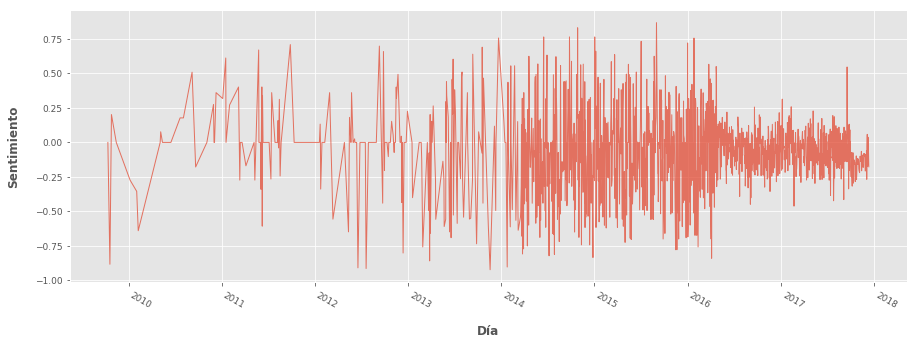

In [16]:
daily_plot = daily_sentiment['Sentimiento_diario'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)

daily_plot.set_xlabel('Día', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('Sentimiento', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL

xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS

#http://matplotlib.org/users/legend_guide.html
#http://nbviewer.ipython.org/gist/olgabot/5357268  ### LIST OF OPTIONS
#legend(fontsize='x-small',loc=2,labelspacing=0.1, frameon=False)#.draggable()
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5) #SET PADDING ABOVE X-AXIS LABELS
#Set x axis label on top of plot, set label text --> https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/
#daily_plot.xaxis.set_label_position('top')

savefig('img/daily sentiment.png', bbox_inches='tight', dpi=300, format='png')   #SAVE PLOT IN PNG FORMAT

In [17]:
weekday_sent = df.groupby(df.index.weekday).apply(f)
print(len(weekday_sent))
weekday_sent

7


,Sentimiento_diario
serie_temporal,
0,-0.092611
1,-0.087157
2,-0.080273
3,-0.084635
4,-0.075363
5,-0.088037
6,-0.087770


In [18]:
days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
weekday_sent['día'] = days
weekday_sent

,Sentimiento_diario,día
serie_temporal,,
0,-0.092611,Lunes
1,-0.087157,Martes
2,-0.080273,Miércoles
3,-0.084635,Jueves
4,-0.075363,Viernes
5,-0.088037,Sabado
6,-0.087770,Domingo


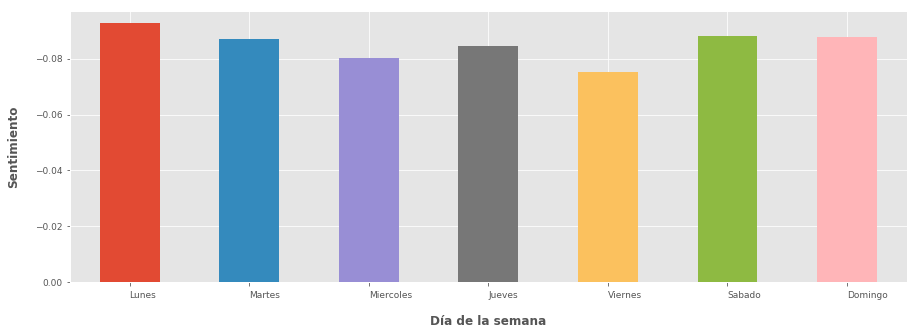

In [19]:
day_of_week_plot = weekday_sent['Sentimiento_diario'].plot(kind='bar')

day_of_week_plot.set_xlabel('Día de la semana', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
day_of_week_plot.set_ylabel('Sentimiento', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL

xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)  #SET FONT PROPERTIES OF Y-AXIS TICK LABELS

###IF WE DON'T WANT TO CREATE ANOTHER COLUMN IN DATAFRAME WE CAN SET CUSTOM LABELS
days = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
xticks(np.arange(7), days, rotation = 0,fontsize = 9) #, ha ="left") 

#http://matplotlib.org/users/legend_guide.html
#http://nbviewer.ipython.org/gist/olgabot/5357268  ### LIST OF OPTIONS
#legend(fontsize='x-small',loc=2,labelspacing=0.1, frameon=False)#.draggable()
day_of_week_plot.legend_ = None
day_of_week_plot.tick_params(axis='x', pad=5) #SET PADDING ABOVE X-AXIS LABELS
#Set x axis label on top of plot, set label text --> https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/
#daily_plot.xaxis.set_label_position('top')
plt.gca().invert_yaxis()
savefig('img/day-of-week sent.png', bbox_inches='tight', dpi=300, format='png')

In [20]:
monthly_sent = df.groupby(df.index.month).apply(f)
monthly_sent

,Sentimiento_diario
serie_temporal,
1,-0.022230
2,-0.043418
3,-0.057313
4,-0.051381
5,-0.041735
6,-0.067559
7,-0.072975
8,-0.055852
9,-0.049902


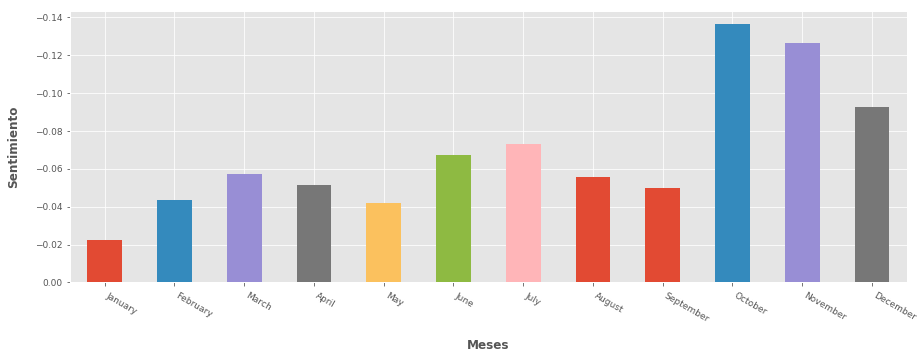

In [21]:
monthly_plot = monthly_sent['Sentimiento_diario'].plot(kind='bar')
months = list(calendar.month_name[1:])                                    #GENERATE LIST OF MONTHS
xticks(np.arange(12), months, rotation = 0,fontsize = 9)                  #USE THE CUSTOM TICKS

monthly_plot.set_xlabel('Meses', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
monthly_plot.set_ylabel('Sentimiento', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL

xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)  #SET FONT PROPERTIES OF Y-AXIS TICK LABELS

#http://matplotlib.org/users/legend_guide.html
#http://nbviewer.ipython.org/gist/olgabot/5357268  ### LIST OF OPTIONS
#legend(fontsize='x-small',loc=2,labelspacing=0.1, frameon=False)#.draggable()
monthly_plot.legend_ = None
monthly_plot.tick_params(axis='x', pad=5) #SET PADDING ABOVE X-AXIS LABELS
#Set x axis label on top of plot, set label text --> https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/
#daily_plot.xaxis.set_label_position('top')
plt.gca().invert_yaxis()
savefig('img/monthly sent - bar graph.png', bbox_inches='tight', dpi=300, format='png')

In [22]:
year_sent = df.groupby(df.index.year).apply(f)
year_sent

,Sentimiento_diario
serie_temporal,
2009,-0.170275
2010,0.057308
2011,0.070049
2012,-0.008697
2013,-0.060530
2014,-0.112681
2015,-0.058170
2016,-0.055965
2017,-0.100512


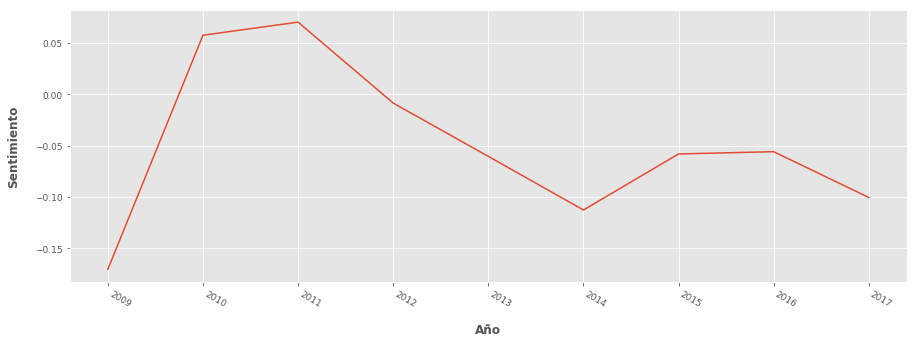

In [23]:
year_plot = year_sent['Sentimiento_diario'].plot(kind='line')

year_plot.set_xlabel('Año', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
year_plot.set_ylabel('Sentimiento', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL

xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS

#http://matplotlib.org/users/legend_guide.html
#http://nbviewer.ipython.org/gist/olgabot/5357268  ### LIST OF OPTIONS
#legend(fontsize='x-small',loc=2,labelspacing=0.1, frameon=False)#.draggable()
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5) #SET PADDING ABOVE X-AXIS LABELS
#Set x axis label on top of plot, set label text --> https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/
#daily_plot.xaxis.set_label_position('top')

savefig('img/year sentiment.png', bbox_inches='tight', dpi=300, format='png')   #SAVE PLOT IN PNG FORMAT

### Series temporales de sentimiento sobre los tuits decididos

In [52]:
def ppos(series):
    counts = series.value_counts()
    num = counts['Positivo']
    den = len(series)
    return round(num/den, 2)
def pneg(series):
    counts = series.value_counts()
    num = counts['Negativo']
    den = len(series)
    return round(num/den, 2)
def pneu(series):
    counts = series.value_counts()
    num = counts['Neutral']
    den = len(series)
    return round(num/den, 2)

In [60]:
ppos(df.categoría)

0.14999999999999999

In [53]:
pneg(df.categoría)

0.27000000000000002

In [54]:
pneu(df.categoría)

0.57999999999999996

In [77]:
def g(x):
    counts = x['categoría'].value_counts()
    try:
        pos = counts['Positivo']
    except:
        pos = 0
    try:
        neg = counts['Negativo']
    except:
        neg = 0
    try:
        neu = counts['Neutral']
    except:
        neu = 0
    tot = pos+neu+neg
        
    return Series(dict(Positivos = pos/tot, Negativos = neg/tot, Neutros = neu/tot))

In [79]:
year_cat_sent = df.groupby(df.index.year).apply(g).round(2)

year_cat_sent

,Negativos,Neutros,Positivos
serie_temporal,,,
2009,0.25,0.75,0.00
2010,0.04,0.88,0.08
2011,0.05,0.86,0.09
2012,0.09,0.84,0.06
2013,0.27,0.58,0.15
2014,0.30,0.58,0.13
2015,0.24,0.61,0.16
2016,0.23,0.64,0.13
2017,0.30,0.55,0.15


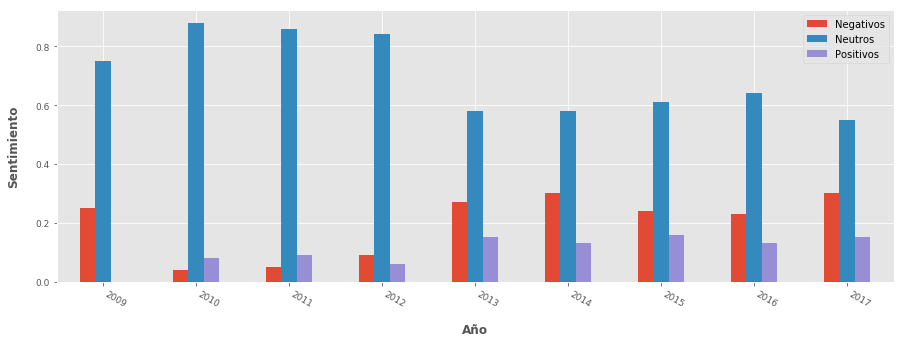

In [82]:
year_cat_plot = year_cat_sent.plot(kind='bar')



year_cat_plot.set_xlabel('Año', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
year_cat_plot.set_ylabel('Sentimiento', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL

xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)  #SET FONT PROPERTIES OF Y-AXIS TICK LABELS

#http://matplotlib.org/users/legend_guide.html
#http://nbviewer.ipython.org/gist/olgabot/5357268  ### LIST OF OPTIONS
#legend(fontsize='x-small',loc=2,labelspacing=0.1, frameon=False)#.draggable()
#monthly_plot.legend_ = None
monthly_plot.tick_params(axis='x', pad=5) #SET PADDING ABOVE X-AXIS LABELS
#Set x axis label on top of plot, set label text --> https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/
#daily_plot.xaxis.set_label_position('top')

savefig('img/year_sent_cat.png', bbox_inches='tight', dpi=300, format='png')

In [87]:
df.verificados = df.verificados.fillna('No verificado')


In [88]:
ver_cat_sent = df.groupby(df.verificados).apply(g).round(2)

ver_cat_sent

,Negativos,Neutros,Positivos
verificados,,,
No verificado,0.28,0.58,0.14
Usuario Verificado,0.17,0.63,0.20


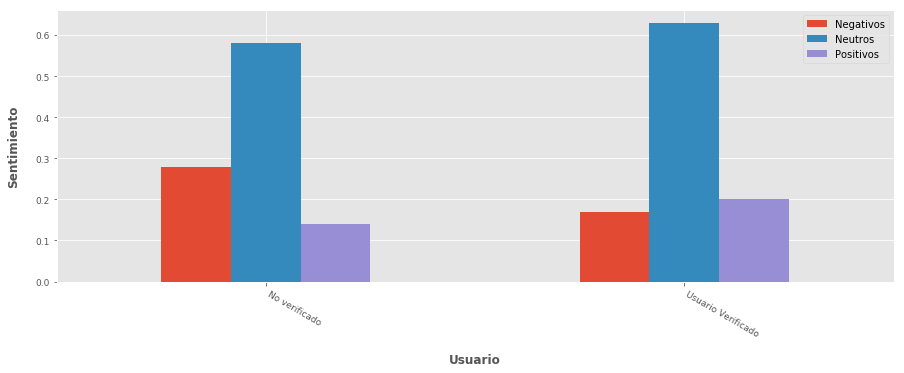

In [89]:
ver_cat_plot = ver_cat_sent.plot(kind='bar')

ver_cat_plot.set_xlabel('Usuario', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
ver_cat_plot.set_ylabel('Sentimiento', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL

xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)  #SET FONT PROPERTIES OF Y-AXIS TICK LABELS

#http://matplotlib.org/users/legend_guide.html
#http://nbviewer.ipython.org/gist/olgabot/5357268  ### LIST OF OPTIONS
#legend(fontsize='x-small',loc=2,labelspacing=0.1, frameon=False)#.draggable()
#monthly_plot.legend_ = None
monthly_plot.tick_params(axis='x', pad=5) #SET PADDING ABOVE X-AXIS LABELS
#Set x axis label on top of plot, set label text --> https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/
#daily_plot.xaxis.set_label_position('top')

savefig('img/ver_sent_cat.png', bbox_inches='tight', dpi=300, format='png')

In [148]:
for name in df['Nombre'][df['verificados']=='Usuario Verificado'][-50:]:
    print(name)

Just Label It
Just Label It
Kavin Senapathy
Real Marsha Wright
Kavin Senapathy
Winn-Dixie
Kevin Folta
Brad Johnson
josh
Patrick Whittle
Mark Joyella
CFS
The Pulse
The Pulse
Brian Cox
Gwen Pearson 🐜 🐛
EU_ScienceHub
Hank Campbell
Nature Partner Jnls
Zaid Hamid
Tom Bevan
Albert Jack  🇬🇧
Jim Greenwood
ACSH
Oliver Willis
Science Friday
Bill Humphrey  🌳 🌀 Climate Emergency
David Gorski
Kevin Folta
PRI's The World
Temasek
CGTN Africa
Zee News
Tamar Haspel
Motherboard
keithlaw
Kevin Folta
Farhad Manjoo (feat. Drake)
Dan Arel  🏴
Malaria No More UK
Ben Huh
Jordan Weissmann LLC
Unitaid
RBM Partnership
Malaria Consortium
keithlaw
Elise Andrew
Dr Darren Saunders
David Wolfe
KTVB Brian Holmes


In [92]:
top_cat_sent = df.groupby(df.tópico).apply(g).round(2)

top_cat_sent

,Negativos,Neutros,Positivos
tópico,,,
Allergy,0.23,0.61,0.16
Environment,0.27,0.53,0.20
FunctionalFood,0.00,0.69,0.31
GoldenRice,0.22,0.65,0.13
biodiversity,0.25,0.61,0.14
bioremediation,0.05,0.86,0.10
cancer,0.78,0.19,0.03
crops,0.25,0.61,0.14
genetransfer,0.10,0.76,0.14


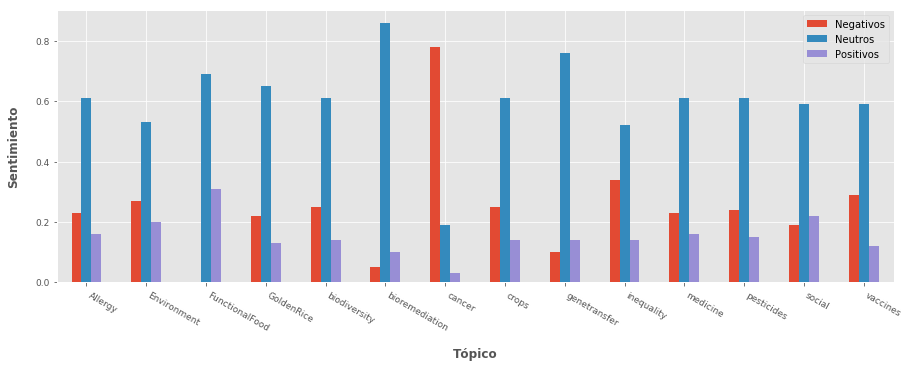

In [154]:
top_cat_plot = top_cat_sent.plot(kind='bar')

top_cat_plot.set_xlabel('Tópico', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
top_cat_plot.set_ylabel('Sentimiento', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL

xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)  #SET FONT PROPERTIES OF Y-AXIS TICK LABELS

#http://matplotlib.org/users/legend_guide.html
#http://nbviewer.ipython.org/gist/olgabot/5357268  ### LIST OF OPTIONS
#legend(fontsize='x-small',loc=2,labelspacing=0.1, frameon=False)#.draggable()
#monthly_plot.legend_ = None
top_cat_plot.tick_params(axis='x', pad=5) #SET PADDING ABOVE X-AXIS LABELS
#Set x axis label on top of plot, set label text --> https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/
#daily_plot.xaxis.set_label_position('top')

savefig('img/top_sent_cat.png', bbox_inches='tight', dpi=300, format='png')

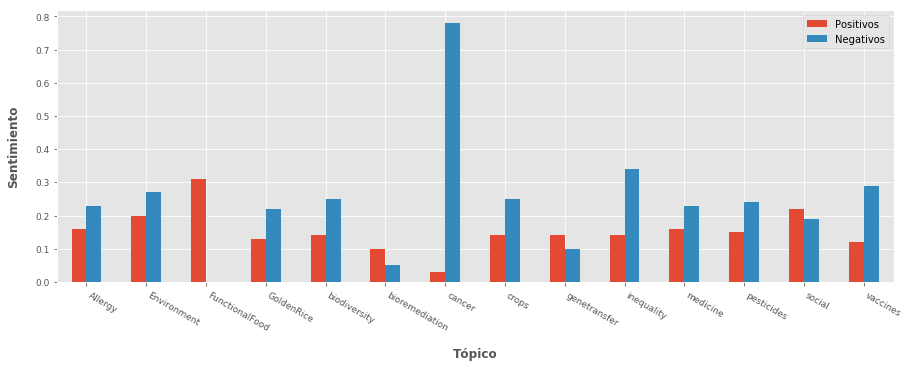

In [153]:
top_cat_plot2 = top_cat_sent[['Positivos', 'Negativos']].plot(kind='bar')

top_cat_plot2.set_xlabel('Tópico', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
top_cat_plot2.set_ylabel('Sentimiento', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL

xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)  #SET FONT PROPERTIES OF Y-AXIS TICK LABELS

#http://matplotlib.org/users/legend_guide.html
#http://nbviewer.ipython.org/gist/olgabot/5357268  ### LIST OF OPTIONS
#legend(fontsize='x-small',loc=2,labelspacing=0.1, frameon=False)#.draggable()
#monthly_plot.legend_ = None
top_cat_plot2.tick_params(axis='x', pad=5) #SET PADDING ABOVE X-AXIS LABELS
#Set x axis label on top of plot, set label text --> https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/
#daily_plot.xaxis.set_label_position('top')

savefig('img/top_sent_cat2.png', bbox_inches='tight', dpi=300, format='png')

In [169]:
top_cat_sent['Diferencia'] = top_cat_sent['Positivos']-top_cat_sent['Negativos']
top_cat_sent

,Negativos,Neutros,Positivos,Diferencia
tópico,,,,
Allergy,0.23,0.61,0.16,-0.07
Environment,0.27,0.53,0.20,-0.07
FunctionalFood,0.00,0.69,0.31,0.31
GoldenRice,0.22,0.65,0.13,-0.09
biodiversity,0.25,0.61,0.14,-0.11
bioremediation,0.05,0.86,0.10,0.05
cancer,0.78,0.19,0.03,-0.75
crops,0.25,0.61,0.14,-0.11
genetransfer,0.10,0.76,0.14,0.04


In [136]:
df['RT_bins'] = pd.cut(df.RT, 5)
df['Fav_bins'] = pd.cut(df.like, 4)

In [132]:
df.head()

,Usuario,Nombre,Fecha,Tweet,RT,like,path,verificados,tópico,sentimiento,categoría,RT_bins,Fav_bins
serie_temporal,,,,,,,,,,,,,
2017-12-10,@jaymee_danielle,zen kitty,10 dic. 2017,issues i have w/ GMO:\n• doesnt taste “natural...,67,179,/jaymee_danielle/status/939965734196842496,No verificado,Allergy,0.0900,Neutral,"(-0.751, 150.2]","(-0.925, 185.0]"
2017-12-10,@systecdb,Dave Baggett,10 dic. 2017,It dawns on me that before GMO foods became pr...,0,1,/systecdb/status/939776697724997632,No verificado,Allergy,0.4767,Positivo,"(-0.751, 150.2]","(-0.925, 185.0]"
2017-12-10,@saltedveg,ingin punya tuyul saja,10 dic. 2017,Coz it's 'cool'. Just like people who suddenly...,1,1,/saltedveg/status/939675324765298688,No verificado,Allergy,0.9068,Positivo,"(-0.751, 150.2]","(-0.925, 185.0]"
2017-12-09,@RMathebulo,Rantho Mathebulo,9 dic. 2017,Alcoholism gout acne genetically modified food...,0,0,/RMathebulo/status/939601946960453633,No verificado,Allergy,-0.7412,Negativo,"(-0.751, 150.2]","(-0.925, 185.0]"
2017-12-08,@carmelabny,JOSEPHINE BOLOGNA,8 dic. 2017,Foods to eat every day and a healthy product t...,7,4,/carmelabny/status/939102225800028160,No verificado,Allergy,0.4738,Positivo,"(-0.751, 150.2]","(-0.925, 185.0]"


In [133]:
top_cat_RTsent = df.groupby(df.RT_bins).apply(g).round(2)

top_cat_RTsent

,Negativos,Neutros,Positivos
RT_bins,,,
"(-0.751, 150.2]",0.27,0.58,0.15
"(150.2, 300.4]",0.40,0.50,0.10
"(300.4, 450.6]",0.00,1.00,0.00
"(450.6, 600.8]",0.00,0.50,0.50
"(600.8, 751.0]",0.00,0.00,1.00


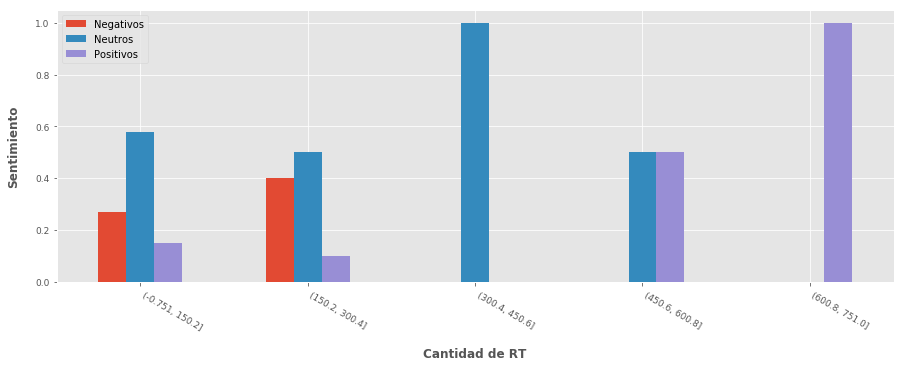

In [134]:
top_cat_RTsent_p = top_cat_RTsent.plot(kind='bar')

top_cat_RTsent_p.set_xlabel('Cantidad de RT', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
top_cat_RTsent_p.set_ylabel('Sentimiento', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL

xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)  #SET FONT PROPERTIES OF Y-AXIS TICK LABELS

#http://matplotlib.org/users/legend_guide.html
#http://nbviewer.ipython.org/gist/olgabot/5357268  ### LIST OF OPTIONS
#legend(fontsize='x-small',loc=2,labelspacing=0.1, frameon=False)#.draggable()
#monthly_plot.legend_ = None
top_cat_RTsent_p.tick_params(axis='x', pad=5) #SET PADDING ABOVE X-AXIS LABELS
#Set x axis label on top of plot, set label text --> https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/
#daily_plot.xaxis.set_label_position('top')

savefig('img/top_cat_RTsent_p.png', bbox_inches='tight', dpi=300, format='png')

In [137]:
top_cat_favsent = df.groupby(df.Fav_bins).apply(g).round(2)

top_cat_favsent

,Negativos,Neutros,Positivos
Fav_bins,,,
"(-0.925, 231.25]",0.27,0.58,0.15
"(231.25, 462.5]",0.20,0.40,0.40
"(462.5, 693.75]",0.00,1.00,0.00
"(693.75, 925.0]",0.00,1.00,0.00


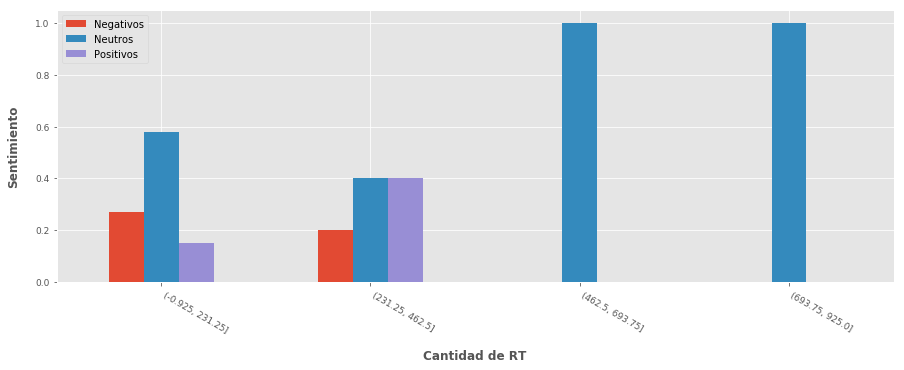

In [150]:
top_cat_favsent_p = top_cat_favsent.plot(kind='bar')

top_cat_favsent_p.set_xlabel('Cantidad de RT', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
top_cat_favsent_p.set_ylabel('Sentimiento', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL

xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)  #SET FONT PROPERTIES OF Y-AXIS TICK LABELS

#http://matplotlib.org/users/legend_guide.html
#http://nbviewer.ipython.org/gist/olgabot/5357268  ### LIST OF OPTIONS
#legend(fontsize='x-small',loc=2,labelspacing=0.1, frameon=False)#.draggable()
#monthly_plot.legend_ = None
top_cat_favsent_p.tick_params(axis='x', pad=5) #SET PADDING ABOVE X-AXIS LABELS
#Set x axis label on top of plot, set label text --> https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/
#daily_plot.xaxis.set_label_position('top')

savefig('img/top_cat_favsent_p.png', bbox_inches='tight', dpi=300, format='png')